# Project - Olympic Sports Analysis [Data Pre-processing]

- You can find the full project & the dataset at: https://www.kaggle.com/the-guardian/olympic-games
- In this project, we will consider these topics:
    - Data Cleaning & Manipulation
    - Data Grouping & Aggregation
    - Data Reshaping & Pivoting
    - Data Merging, Joining, & Concatenation

## Olympic Sports and Medals, 1896-2014


### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
countries = pd.read_csv(r'Y:\03 Data analysis\0110\olympics\dictionary.csv')
summer = pd.read_csv(r"Y:\03 Data analysis\0110\olympics\summer.csv")
winter = pd.read_csv(r"Y:\03 Data analysis\0110\olympics\winter.csv")

### Inspecting Datasets

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [6]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [7]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [8]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [9]:
# Listing all of the missing data in the 'countries' dataframe
countries[countries.isnull().any(axis = 1)].reset_index(drop=True)

,Country,Code,Population,GDP per Capita
0,American Samoa*,ASA,55538.0,NaN
1,Andorra,AND,70473.0,NaN
2,Aruba*,ARU,103889.0,NaN
3,Bermuda*,BER,65235.0,NaN
4,British Virgin Islands,IVB,30117.0,NaN
5,Cayman Islands*,CAY,59967.0,NaN
6,Cook Islands,COK,NaN,NaN
7,Cuba,CUB,11389562.0,NaN
8,Eritrea,ERI,NaN,NaN
9,Guam,GUM,169885.0,NaN


### Proposed Questions

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

- ***Which are the most successful countries in both Summer and Winter editions?***
    - What are the __Top 10__ Countries by __total medals__?
    - __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
    - __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 


==========

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

##### Q. Can you find the highest male / female athletes & country of all time in the Summer editions

In [10]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [11]:
# Modify the full name of the athletes in Winter and Summer editions
summer['Athlete'] = summer['Athlete'].str.split(', ').str[::-1].str.join(' ') #str[::-1]=> to inverse list 
summer['Athlete'] = summer['Athlete'].str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [12]:
# The highest male athlete of all Summer editions 
male_athlete = summer[summer['Gender']=='Men']['Athlete'].value_counts().index[0] 
male_athlete

'Michael Phelps'

In [13]:
# His total number of medals
num_of_male_medals=summer[summer["Gender"]=="Men"]['Athlete'].value_counts().values[0]
num_of_male_medals

22

In [14]:
# The highest female athlete of all Summer editions 
female_athlete = summer[summer['Gender']=='Women']['Athlete'].value_counts().index[0] 
female_athlete

'Larisa Latynina'

In [15]:
# Her total number of medals
num_of_female_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts().values[0]
num_of_female_medals

18

==========

##### Q. Find the highest athletes regarding to each medal type in the Summer editions

In [16]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [17]:
# Let's discover what does 'Michael Phelps' have of medals  
summer[summer.Athlete == 'Michael Phelps']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
25225,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold
25253,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold
25258,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Freestyle,Bronze
25265,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Individual Medley,Gold
25277,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,400M Individual Medley,Gold
25286,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Freestyle Relay,Bronze
25325,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Medley Relay,Gold
25361,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X200M Freestyle Relay,Gold
27224,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold
27252,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold


In [18]:
top_medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
top_medals

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [19]:
top_medals = top_medals.drop_duplicates(subset=['Medal'],keep='first')
top_medals.columns = [['Athlete','Medal','Count']]
top_medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


=============

##### Q. Which are the most successful countries in both Summer and Winter editions?
- What are the __Top 10__ Countries by __total medals__?
- __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
- __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [20]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [21]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [22]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [23]:
# Now you can easily merge the two dataframes because the columns are the same
olympics=pd.concat([summer,winter],keys=["Summer", "Winter"],names=["Edition"]).reset_index().drop(columns="level_1")
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [24]:
# We need to refine our 'olympics' dataframe by adding the 'country' column
olympics = olympics.merge(countries.iloc[:, :2], how = "left", left_on = "Country", right_on = "Code").drop(columns = ["Code"])
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


#### 2] Data Cleaning

In [25]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [26]:
olympics.rename(columns = {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

##### For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values!

In [27]:
# Finding the missing data in the new dataframe
olympics.loc[olympics.Country.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [28]:
# List all of the old countries' codes
olympics.loc[olympics.Country.isnull()].Code.value_counts()

Code
URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: count, dtype: int64

In [29]:
# Get all of the indicies of the old countries
old_indices = olympics.loc[olympics.Country.isnull()].Code.value_counts().index
old_indices

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

In [30]:
# Create a mapper to match the old countries' codes with their corresponding names
mapper = pd.Series(index=old_indices, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

mapper



Code
URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [31]:
# Let's get all the missing data indicies to map them to countries
missing_indices = olympics.loc[olympics.Country.isnull()].index
missing_indices

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979, 33980],
      dtype='int64', length=6367)

In [32]:
# Now, we need to map the names
olympics.loc[missing_indices, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [33]:
# Filling the missing data with the new names
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

C:\Users\20102\AppData\Local\Temp\ipykernel_10936\2437805990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)


In [34]:
olympics.loc[missing_indices]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,John Boland,ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


##### Remove rows from olympics where the Country code is unknown

In [35]:
# Double-check for any missing data
olympics[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,Besik Kudukhov,NaN,Men,Wf 60 KG,Silver,NaN


In [36]:
# Drop these missing records
olympics.dropna(subset = ["Code"], inplace = True)

In [37]:
# Reseting indicies to get rid of the deleted records
olympics.reset_index(drop = True, inplace = True)

In [38]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


#### 3] Data Analysis & Visualization (EDA)

##### Q. What are the Top 10 Countries by total medals?

In [39]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [40]:
top_10 = olympics.Country.value_counts().head(10)
top_10

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

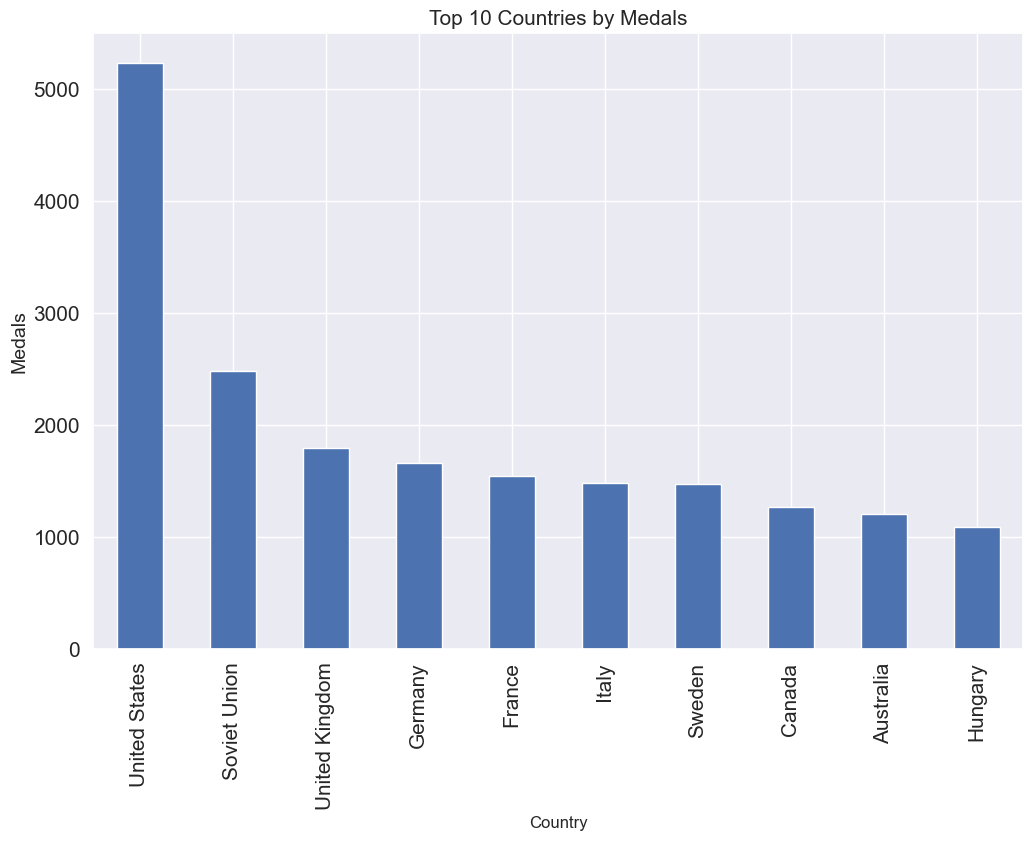

In [41]:
top_10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

##### Q. Split the total medals of Top 10 Countries into Summer / Winter. Are there typical Summer/Winter Games Countries?

In [42]:
top_10.index

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary'],
      dtype='object', name='Country')

In [43]:
olympics_10=olympics[olympics['Country'].isin(top_10.index)]

<Axes: xlabel='Country', ylabel='count'>

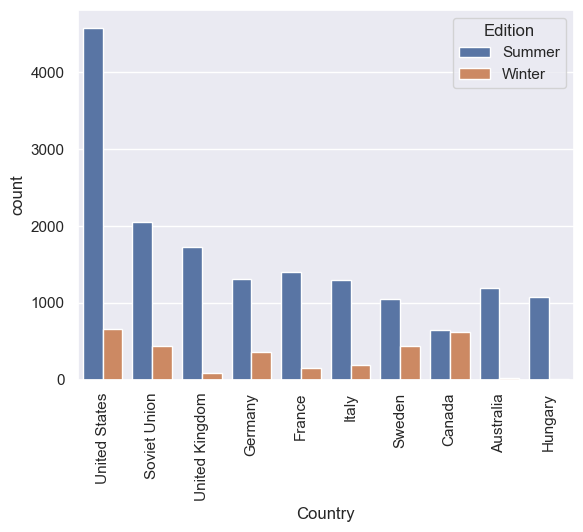

In [44]:
plt.xticks(rotation=90)
sns.countplot(data=olympics_10,x="Country",hue="Edition",order=top_10.index)

##### Q. Split the total medals of Top 10 Countries into Gold, Silver, Bronze

In [45]:
olympics['Medal'] = olympics['Medal'].astype("category")

In [46]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [47]:
olympics['Medal'].sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [48]:
olympics['Medal']=olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True)

In [49]:
olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

<Axes: xlabel='Country', ylabel='count'>

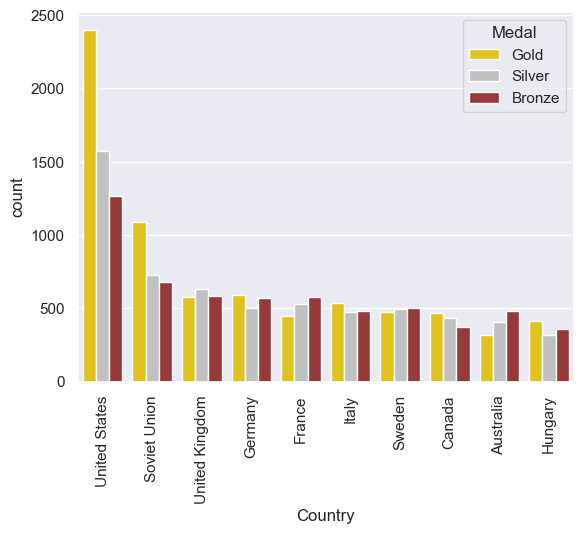

In [50]:
plt.xticks(rotation=90)
sns.countplot(data=olympics_10,x="Country",hue="Medal",order=top_10.index,
               hue_order=['Gold','Silver','Bronze'],palette=['gold','silver','brown'])

===========

# THANK YOU!